# EDA

For choosing my dataset, I was choosing between:
* Customer Support on Twitter https://www.kaggle.com/thoughtvector/customer-support-on-twitter
* Ubuntu Dialogue Corpus https://www.kaggle.com/rtatman/ubuntu-dialogue-corpus
* Relational Services in Customer Service (RSICS) https://nextit-public.s3-us-west-2.amazonaws.com/rsics.html

Example end-to-end projects:
* [A Transformer Chatbot Tutorial with TensorFlow 2.0](https://medium.com/tensorflow/a-transformer-chatbot-tutorial-with-tensorflow-2-0-88bf59e66fe2)
* [Google Colaboratory](https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/transformer_chatbot.ipynb#scrollTo=dYRx7YzCW4bu)
* [Messenger Chatbot from Scratch] (https://github.com/daoudclarke/chatbot-from-scratch)


Intents I want to classify:

In [ ]:
# Making a dictionary to store intents and the predefined responses 
{"Greeting": ["Hi there!","Hello"], 
 "":"", ""
    
}

In [2]:
print("Versions")
# Data science
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")
# Deep Learning 
import tensorflow as tf
print(f"Tensorflow: {tf.__version__}")
from tensorflow import keras
print(f"Keras: {keras.__version__}")
import sklearn
print(f"Sklearn: {sklearn.__version__}")
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Text preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import casual_tokenize

Versions
Pandas: 1.0.1
Numpy: 1.18.1
Tensorflow: 2.0.0-rc1
Keras: 2.2.4-tf
Sklearn: 0.22.1


# Twitter
Notes about dataset:
* It's from 2017 to 2018

In [3]:
!ls data/4133-8841-bundle-archive/sample.csv

data/4133-8841-bundle-archive/sample.csv


In [4]:
sample = pd.read_csv('data/4133-8841-bundle-archive/sample.csv')

In [5]:
# Seeing distribution of authors 
def see_authors(data):
    ''' Made this to visualize author distribution'''
    sample_authors = data.groupby('author_id').size()
    sample_authors = pd.DataFrame({'Author ID': sample_authors.index, 'Count': sample_authors.values})
    sample_authors.sort_values(by = 'Count',ascending = False,inplace=True)
    plt.figure(figsize=(15,10))
    x = sample_authors['Author ID']
    y = sample_authors['Count']
    plt.xticks(rotation=90)
    plt.title('Distribution of Authors')
    plt.bar(x,y, color = '#00acee')
    plt.show()

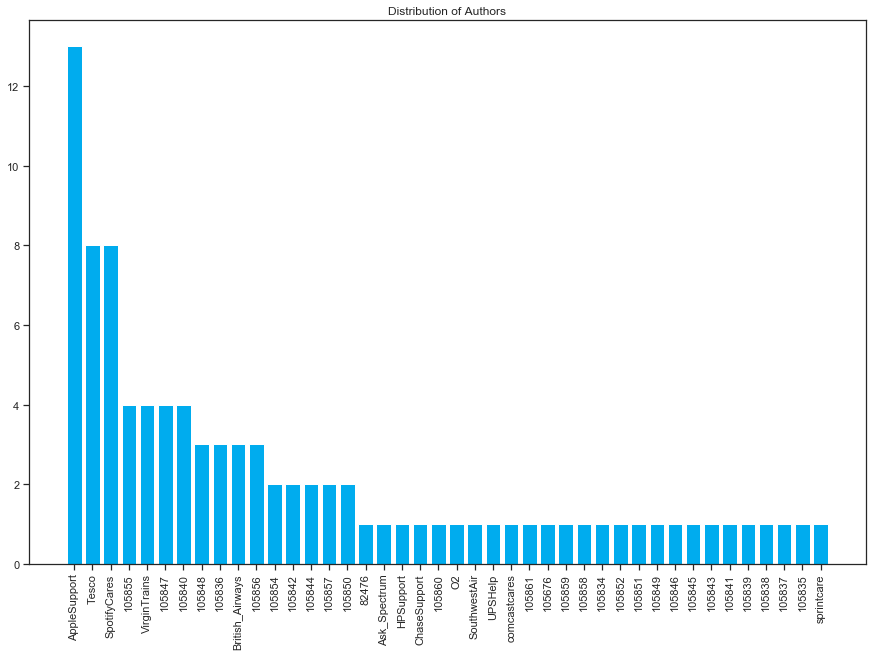

In [6]:
see_authors(sample)

In [7]:
%%time
all_data = pd.read_csv('data/4133-8841-bundle-archive/twcs.csv')

CPU times: user 8.49 s, sys: 2.3 s, total: 10.8 s
Wall time: 11.5 s


In [23]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     string 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(3), string(1)
memory usage: 131.4+ MB


In [21]:
# Takes too long
# see_authors(all_data)
all_data['text'] = all_data['text'].astype('string')

In [22]:
all_data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [11]:
all_data['text'][all_data['inbound'] == True]

1              @sprintcare and how do you propose we do that
2          @sprintcare I have sent several private messag...
4                                         @sprintcare I did.
6                  @sprintcare is the worst customer service
8          @sprintcare You gonna magically change your co...
                                 ...                        
2811765    @AirAsiaSupport \n\nI am unable to do web chec...
2811768    @VirginTrains Hope you are well? Does the 9.30...
2811770    @115714 wtf!? I’ve been having really shitty s...
2811771    @143549 @sprintcare You have to go to https://...
2811773    @AldiUK  warm sloe gin mince pies with ice cre...
Name: text, Length: 1537843, dtype: object

Taking a peek through all the responses to get a feel of their raw format

In [12]:
# For inbound
print('OUTBOND/COMPANY')
all_data['text'][all_data['inbound'] == False][0:50]

OUTBOND/COMPANY


0      @115712 I understand. I would like to assist y...
3      @115712 Please send us a Private Message so th...
5      @115712 Can you please send us a private messa...
7      @115713 This is saddening to hear. Please shoo...
9      @115713 We understand your concerns and we'd l...
11     @115713 H there! We'd definitely like to work ...
13     @115715 Please send me a private message so th...
15            @115716 What information is incorrect? ^JK
17     @115716 Our department is part of the corporat...
19                             @115716 No thank you. ^JK
22     @115716 The information pertaining to the acco...
24     @115717 Hello, My apologies for any frustratio...
26     @115718 I apologize for the inconvenience. I w...
28     @115719 Help has arrived! We are sorry to see ...
30     @115719 Awesome! If you ever need us we are ju...
32            @115720 Have your friend message us.\n^ACM
34     @115721 Please follow and DM us so that we can...
36     @115721 We would not be 

In [13]:
# For outbound
print('INBOUND/CONSUMER')
all_data['text'][all_data['inbound'] == True][0:50]

INBOUND/CONSUMER


1         @sprintcare and how do you propose we do that
2     @sprintcare I have sent several private messag...
4                                    @sprintcare I did.
6             @sprintcare is the worst customer service
8     @sprintcare You gonna magically change your co...
10    @sprintcare Since I signed up with you....Sinc...
12    @115714 y’all lie about your “great” connectio...
14    @115714 whenever I contact customer support, t...
16    @Ask_Spectrum Would you like me to email you a...
18    @Ask_Spectrum I received this from your corpor...
20    @Ask_Spectrum The correct way to do it is via ...
21    @Ask_Spectrum That is INCORRECT information I ...
23    actually that's a broken link you sent me and ...
25    Yo @Ask_Spectrum, your customer service reps a...
27    My picture on @Ask_Spectrum pretty much every ...
29    @VerizonSupport I finally got someone that hel...
31    somebody from @VerizonSupport please help meee...
33    @VerizonSupport My friend is without inter

In [14]:
%%time
# all_data['created_at'].hist()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


# Text Preprocessing
Using Keras https://keras.io/api/preprocessing/text/

Here are the proprocessing steps I will move forward with:
* Tokenization

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0


# Ubuntu

In [3]:
# Reading in Ubuntu data
df = pd.read_csv('data/Ubuntu-dialogue-corpus/dialogueText.csv')

In [4]:
# Visualizing the tables, applying styling so that the table is more readable
show = lambda x: x.tail(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})\
.applymap(lambda x: f"color: {'lawngreen' if isinstance(x,str) else 'red'}")\
.background_gradient(cmap='Blues')

In [5]:
show(df)

,folder,dialogueID,date,from,to,text
1038314,3,72561.tsv,2010-05-14T04:52:00.000Z,skierpage,lokpest_,I'm not sure if NetworkManager is started at desktop login. Try `ps alx | grep -i net` and see if anything's running. You can restart it with maybe `restart network-manager` ??
1038315,3,19585.tsv,2011-04-04T21:55:00.000Z,CarlFK,benzaldehyde,S-video can do sound?
1038316,3,19585.tsv,2011-04-04T21:55:00.000Z,benzaldehyde,CarlFK,"well maybe not sound, i don't remember"
1038317,3,19585.tsv,2011-04-04T21:56:00.000Z,CarlFK,benzaldehyde,"'S-Video carries standard definition video (typically at 480i or 576i resolution), but does not carry audio on the same cable.' http://en.wikipedia.org/wiki/Svideo"
1038318,3,51506.tsv,2012-01-31T10:55:00.000Z,DJ,nan,?
1038319,3,51506.tsv,2012-01-31T10:56:00.000Z,DJ,nan,anyone on?
1038320,3,51506.tsv,2012-01-31T10:56:00.000Z,aeon-ltd,DJ,yes
1038321,3,99669.tsv,2008-11-16T20:11:00.000Z,KR-data,nan,can I get a pastebin of someones menu.lst with a working dualboot with XP?
1038322,3,99669.tsv,2008-11-16T20:12:00.000Z,outbackwifi,KR-data,http://pastebin.com/fe921690
1038323,3,99669.tsv,2008-11-16T20:13:00.000Z,KR-data,outbackwifi,thanks


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038324 entries, 0 to 1038323
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   folder      1038324 non-null  int64 
 1   dialogueID  1038324 non-null  object
 2   date        1038324 non-null  object
 3   from        1038311 non-null  object
 4   to          566035 non-null   object
 5   text        1038237 non-null  object
dtypes: int64(1), object(5)
memory usage: 47.5+ MB


In [16]:
df['text']

0          Hello folks, please help me a bit with the fol...
1          Did I choose a bad channel? I ask because you ...
2          the second sentence is better english   and we...
3                                               Sock Puppe?t
4                                                       WTF?
                                 ...                        
1038319                                           anyone on?
1038320                                                  yes
1038321    can I get a pastebin of someones menu.lst with...
1038322                         http://pastebin.com/fe921690
1038323                                               thanks
Name: text, Length: 1038324, dtype: object

# Relational Services in Customer Service (RSICS)

In [16]:
!ls data/rsics_dataset

1_1_align.csv                     5_4_align.csv
1_2_align.csv                     6_1_align.csv
1_3_align.csv                     6_2_align.csv
1_4_align.csv                     6_3_align.csv
2_1_align.csv                     6_4_align.csv
2_2_align.csv                     7_1_align.csv
2_3_align.csv                     7_2_align.csv
2_4_align.csv                     7_3_align.csv
3_1_align.csv                     7_4_align.csv
3_2_align.csv                     8_1_align.csv
3_3_align.csv                     8_2_align.csv
3_4_align.csv                     8_3_align.csv
4_1_align.csv                     8_4_align.csv
4_2_align.csv                     LICENSE.md
4_3_align.csv                     README.md
4_4_align.csv                     all_data_by_threshold.csv
5_1_align.csv                     all_multi_intent.csv
5_2_align.csv                     rsics.bib
5_3_align.csv                     tagged_selections_by_sentence.csv


In [18]:
pd.read_csv('data/rsics_dataset/1_2_align.csv')

,Annotator A ID,Annotator B ID,Parition ID,Corpora ID,Sentence ID,Text,Annotator A Text,Annotator B Text,Length,Error,Alignment Score,Agreement
0,1,7.000000,2.0,2.0,7506.0,what is the price for round trip between toron...,what is the price for round trip between toron...,what is the price for round trip between toron...,61.0,0.0,1.000000,1.0
1,1,7.000000,2.0,2.0,7507.0,trying to find a good deal and good timing to ...,trying to find a good deal and good timing to ...,[trying to find a ]good deal and good timing t...,81.0,17.0,0.790123,0.0
2,1,7.000000,2.0,2.0,7509.0,trying to plan route penn ny to montgomery ny....,trying to plan route penn ny to montgomery ny....,trying to plan route penn ny to montgomery ny....,63.0,16.0,0.746032,0.0
3,1,7.000000,2.0,2.0,7510.0,"Hi does the 54 Vermonter train go from Newark,...",[Hi ]does the 54 Vermonter train go from Newar...,[Hi ]does the 54 Vermonter train go from Newar...,87.0,10.0,0.885057,1.0
4,1,7.000000,2.0,2.0,7511.0,is there a train service from los angeles ca t...,is there a train service from los angeles ca t...,is there a train service from los angeles ca t...,64.0,0.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2659,Average Length,97.922122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,Average Error,0.076430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,Average Alignment,0.923570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
